In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [3]:
def save_data_hdf5(filename, data):
    """
    Saves data in HDF5. Does it in a simple way by looping through data and datasetnames
    filename: Filename of file you want to save
    data: the data you want to save as a dictionary
    """
    keys = list(data.keys())
    with h5py.File(filename, "w") as f:
        for key in keys:
            f[key] = data[key]
        #f.close()
    return 0

def load_data_hdf5(filename):
    """
    Loads data in HDF5. Doesn't load metadata. Outputs as dictionary.
    filename: Filename of file you want to load
    """
    f = h5py.File(filename, "r")
    keys = list(f.keys())
    mdict = {}
    for key in keys:
        dataset = list(f[key])
        mdict[key] = dataset
    f.close()
    return mdict

In [14]:
filename = 'D:/Lab Data/Picoscope Test/Benchmarking/deadtime_nosaving_noadc2mv_7channel.hdf5'
data = load_data_hdf5(filename)

filename = 'D:/Lab Data/Picoscope Test/Benchmarking/deadtime_saving_noadc2mv_7channel.hdf5'
data2 = load_data_hdf5(filename)

filename = 'D:/Lab Data/Picoscope Test/Benchmarking/deadtime_saving_adc2mv_7channel.hdf5'
data3 = load_data_hdf5(filename)

filename = 'D:/Lab Data/Picoscope Test/Benchmarking/deadtime_saving2_noadc2mv_7channel.hdf5'
data4 = load_data_hdf5(filename)

filename = 'D:/Lab Data/Picoscope Test/Benchmarking/deadtime_saving3_noadc2mv_7channel.hdf5'
data5 = load_data_hdf5(filename)

In [15]:
diffs_avr = np.zeros(len(data['trace time']))
diffs_std = np.zeros(len(data['trace time']))
for n, diffs in enumerate(data['trace time']):
    diffs_avr[n] = np.mean(diffs)
    diffs_std[n] = np.std(diffs)/np.sqrt(len(data['trace time'][0]))

diffs_avr2 = np.zeros(len(data2['trace time']))
diffs_std2 = np.zeros(len(data2['trace time']))
for n, diffs in enumerate(data2['trace time']):
    diffs_avr2[n] = np.mean(diffs)
    diffs_std2[n] = np.std(diffs)/np.sqrt(len(data2['trace time'][0]))

diffs_avr3 = np.zeros(len(data3['trace time']))
diffs_std3 = np.zeros(len(data3['trace time']))
for n, diffs in enumerate(data3['trace time']):
    diffs_avr3[n] = np.mean(diffs)
    diffs_std3[n] = np.std(diffs)/np.sqrt(len(data3['trace time'][0]))

diffs_avr4 = np.zeros(len(data4['trace time']))
diffs_std4 = np.zeros(len(data4['trace time']))
for n, diffs in enumerate(data4['trace time']):
    diffs_avr4[n] = np.mean(diffs)
    diffs_std4[n] = np.std(diffs)/np.sqrt(len(data4['trace time'][0]))

diffs_avr5 = np.zeros(len(data5['trace time']))
diffs_std5 = np.zeros(len(data5['trace time']))
for n, diffs in enumerate(data5['trace time']):
    diffs_avr5[n] = np.mean(diffs)
    diffs_std5[n] = np.std(diffs)/np.sqrt(len(data5['trace time'][0]))

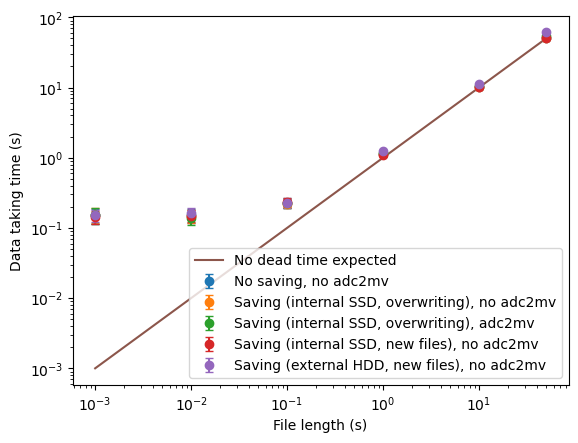

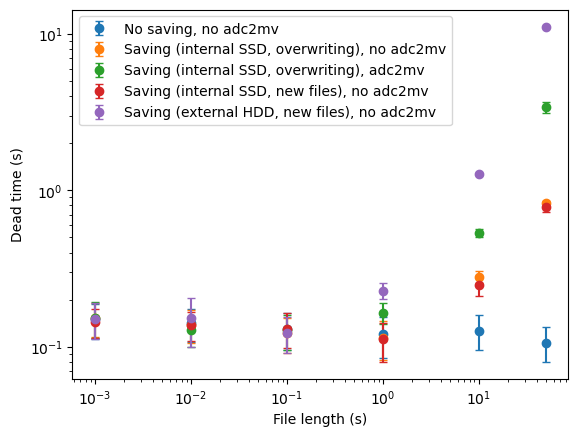

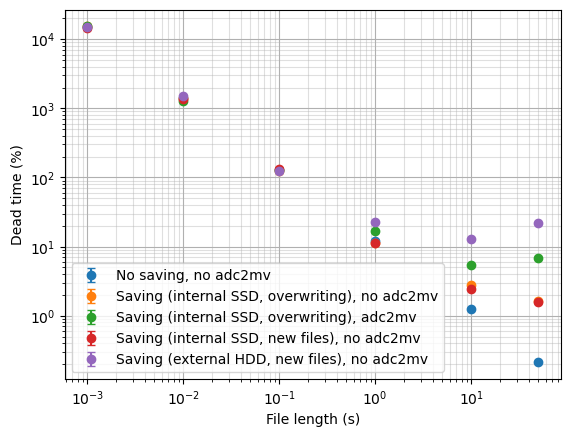

In [18]:
plt.figure()
plt.errorbar(data['trace length'], diffs_avr, yerr = diffs_std, marker = 'o', linestyle = 'None', capsize = 3, label = 'No saving, no adc2mv')
plt.errorbar(data2['trace length'], diffs_avr2, yerr = diffs_std2, marker = 'o', linestyle = 'None', capsize = 3, label = 'Saving (internal SSD, overwriting), no adc2mv')
plt.errorbar(data3['trace length'], diffs_avr3, yerr = diffs_std3, marker = 'o', linestyle = 'None', capsize = 3, label = 'Saving (internal SSD, overwriting), adc2mv')
plt.errorbar(data4['trace length'], diffs_avr4, yerr = diffs_std4, marker = 'o', linestyle = 'None', capsize = 3, label = 'Saving (internal SSD, new files), no adc2mv')
plt.errorbar(data5['trace length'], diffs_avr5, yerr = diffs_std4, marker = 'o', linestyle = 'None', capsize = 3, label = 'Saving (external HDD, new files), no adc2mv')
plt.plot(data['trace length'], data['trace length'], label = 'No dead time expected')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Data taking time (s)')
plt.xlabel('File length (s)')
plt.legend()
plt.show()

plt.figure()
plt.errorbar(data['trace length'], diffs_avr-data['trace length'], yerr = diffs_std, marker = 'o', linestyle = 'None', capsize = 3, label = 'No saving, no adc2mv')
plt.errorbar(data2['trace length'], diffs_avr2-data2['trace length'], yerr = diffs_std2, marker = 'o', linestyle = 'None', capsize = 3, label = 'Saving (internal SSD, overwriting), no adc2mv')
plt.errorbar(data3['trace length'], diffs_avr3-data3['trace length'], yerr = diffs_std3, marker = 'o', linestyle = 'None', capsize = 3, label = 'Saving (internal SSD, overwriting), adc2mv')
plt.errorbar(data4['trace length'], diffs_avr4-data4['trace length'], yerr = diffs_std4, marker = 'o', linestyle = 'None', capsize = 3, label = 'Saving (internal SSD, new files), no adc2mv')
plt.errorbar(data5['trace length'], diffs_avr5-data5['trace length'], yerr = diffs_std5, marker = 'o', linestyle = 'None', capsize = 3, label = 'Saving (external HDD, new files), no adc2mv')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Dead time (s)')
plt.xlabel('File length (s)')
plt.legend()
plt.show()

plt.figure()
plt.grid()
plt.grid(which = 'minor', alpha = 0.4)
plt.errorbar(data['trace length'], 100*(diffs_avr-data['trace length'])/data['trace length'], yerr = diffs_std/data['trace length'], marker = 'o', linestyle = 'None', capsize = 3, label = 'No saving, no adc2mv')
plt.errorbar(data2['trace length'], 100*(diffs_avr2-data2['trace length'])/data2['trace length'], yerr = diffs_std2/data2['trace length'], marker = 'o', linestyle = 'None', capsize = 3, label = 'Saving (internal SSD, overwriting), no adc2mv')
plt.errorbar(data3['trace length'], 100*(diffs_avr3-data3['trace length'])/data3['trace length'], yerr = diffs_std3/data3['trace length'], marker = 'o', linestyle = 'None', capsize = 3, label = 'Saving (internal SSD, overwriting), adc2mv')
plt.errorbar(data4['trace length'], 100*(diffs_avr4-data4['trace length'])/data4['trace length'], yerr = diffs_std4/data4['trace length'], marker = 'o', linestyle = 'None', capsize = 3, label = 'Saving (internal SSD, new files), no adc2mv')
plt.errorbar(data5['trace length'], 100*(diffs_avr5-data5['trace length'])/data5['trace length'], yerr = diffs_std5/data5['trace length'], marker = 'o', linestyle = 'None', capsize = 3, label = 'Saving (external HDD, new files), no adc2mv')
plt.xscale('log')
plt.yscale('log')
plt.ylabel('Dead time (%)')
plt.xlabel('File length (s)')
plt.legend()
plt.show()